In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sys
sys.path.append("..")
from dpa.dpa_fit import DPA

In [2]:
n = 10000
x_tr, color_tr = datasets.make_s_curve(n, noise=0.1, random_state=22)
x_te, color_te = datasets.make_s_curve(n, noise=0.1, random_state=222)

In [3]:
def plot_3d(points, points_color=None, title=None, save_dir=None):
    x, y, z = points.T
    fig, ax = plt.subplots(
        figsize=(5, 5),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    if title is not None:
        fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    if save_dir is not None:
        plt.savefig(save_dir, bbox_inches='tight')
    plt.show()

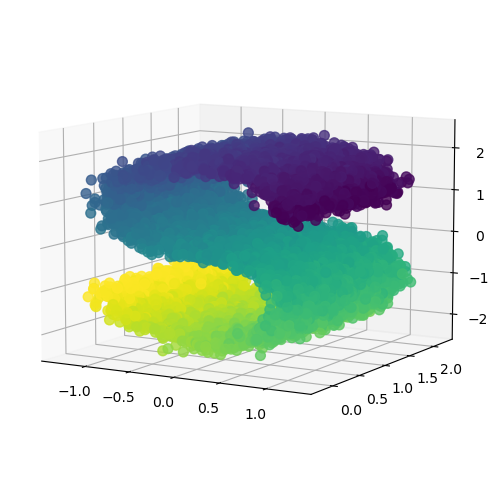

In [4]:
plot_3d(x_te, color_te)

In [5]:
x_tr = torch.Tensor(x_tr)
x_te = torch.Tensor(x_te).to(device)

In [6]:
dpa = DPA(data_dim=3, latent_dims=[3,2,1,0], num_layer=4, hidden_dim=500, device=device)

GPU is available, running on GPU.



In [7]:
dpa.train(x_tr, x_te, batch_size=500, num_epochs=1000)

Start training with 20 batches each of size 500.



[Epoch 1] 1.2245, 1.2285, 1.3391, 1.3720
 pred 	1.5449, 1.5591, 1.7082, 1.7651
 var 	0.6409, 0.6611, 0.7382, 0.7863
(test)	0.7091, 0.7102, 1.0699, 1.2200
 pred 	1.0512, 1.0622, 1.5509, 1.7552
 var 	0.6841, 0.7038, 0.9619, 1.0705

[Epoch 100] 0.0594, 0.1111, 0.3956, 1.0967
 pred 	0.1446, 0.2681, 0.8570, 2.0987
 var 	0.1704, 0.3140, 0.9227, 2.0040
(test)	0.0588, 0.1131, 0.3968, 1.0912
 pred 	0.1441, 0.2729, 0.8524, 2.0949
 var 	0.1706, 0.3197, 0.9112, 2.0073

[Epoch 200] 0.0436, 0.0803, 0.3529, 1.0959
 pred 	0.1114, 0.1884, 0.7508, 2.1283
 var 	0.1356, 0.2162, 0.7957, 2.0648
(test)	0.0419, 0.0799, 0.3479, 1.0943
 pred 	0.1096, 0.1889, 0.7517, 2.1342
 var 	0.1355, 0.2180, 0.8077, 2.0798

[Epoch 300] 0.0376, 0.0720, 0.3424, 1.0827
 pred 	0.0961, 0.1649, 0.7205, 2.1460
 var 	0.1171, 0.1857, 0.7562, 2.1267
(test)	0.0438, 0.0752, 0.3443, 1.0940
 pred 	0.1031, 0.1684, 0.7236, 2.1522
 var 	0.1186, 0.1865, 0.7586, 2.1164

[Epoch 400] 0.0330, 0.0678, 0.3291, 1.0842
 pred 	0.0849, 0.1540, 0.6941, 

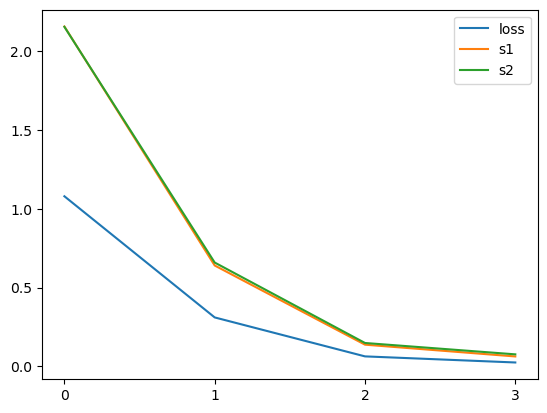

In [8]:
dpa.plot_energy_loss(x_te, xscale='linear')

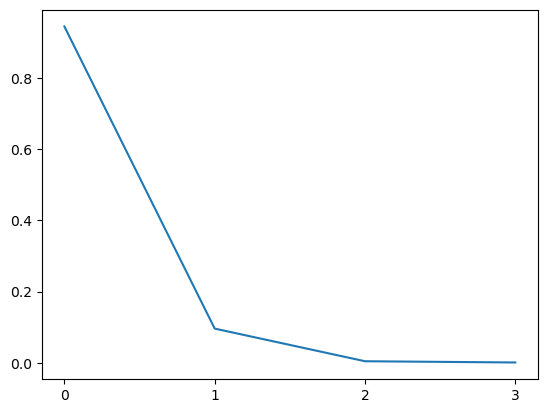

In [9]:
dpa.plot_mse(x_te, xscale='linear')

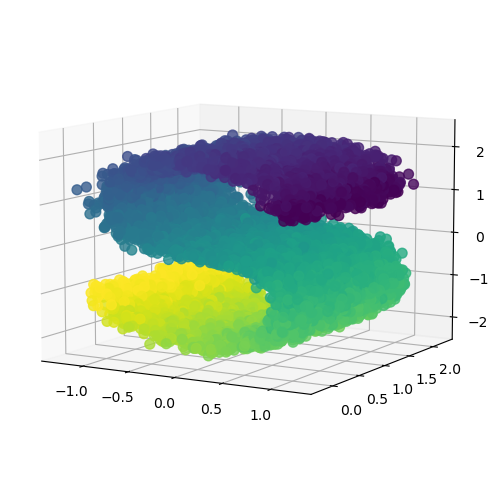

In [10]:
x_re = dpa.reconstruct(x_te, gen_sample_size=1).cpu()
plot_3d(x_re, color_te)

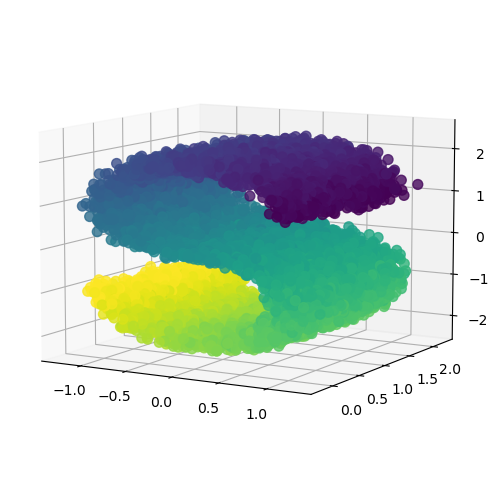

In [11]:
x_re = dpa.reconstruct(x_te, k=2, gen_sample_size=1).cpu()
plot_3d(x_re, color_te)

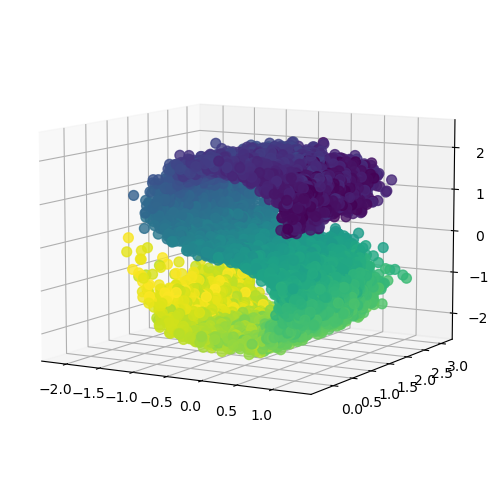

In [12]:
x_re = dpa.reconstruct(x_te, k=1, gen_sample_size=1).cpu()
plot_3d(x_re, color_te)

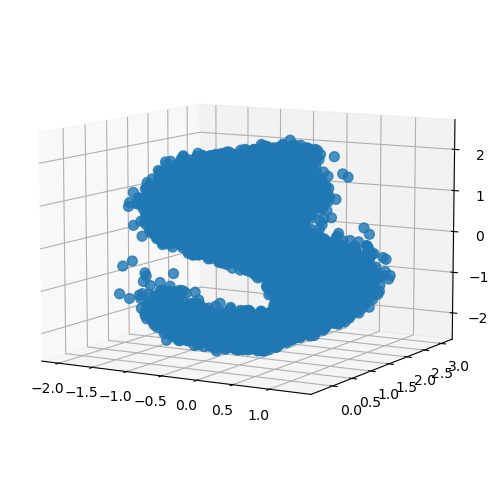

In [13]:
x_re = dpa.reconstruct(x_te, k=0, gen_sample_size=1).cpu()
plot_3d(x_re)